In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025


На сайте лежит топ-500, а нам нужен топ-1 за каждые пол года, одногруппники скинули уже готовый Json, поэтому кода здесь не будет :)

In [2]:
df_top_500 = pd.read_json('top500.json').T

In [3]:
df_top_500.head()

,Sum,#1,#500
1993-06-01,"[1100.0, GFlop/s]","[59.7, GFlop/s]","[0.4, GFlop/s]"
1993-11-01,"[1500.0, GFlop/s]","[124.0, GFlop/s]","[0.5, GFlop/s]"
1994-06-01,"[2300.0, GFlop/s]","[143.4, GFlop/s]","[0.8, GFlop/s]"
1994-11-01,"[2700.0, GFlop/s]","[170.0, GFlop/s]","[1.2, GFlop/s]"
1995-06-01,"[3900.0, GFlop/s]","[170.0, GFlop/s]","[2.0, GFlop/s]"


нужны только даты и прозводительность

In [4]:
top500 = df_top_500['#1'].apply(lambda x: x[0])

In [5]:
top500.head()

1993-06-01     59.7
1993-11-01    124.0
1994-06-01    143.4
1994-11-01    170.0
1995-06-01    170.0
Name: #1, dtype: float64

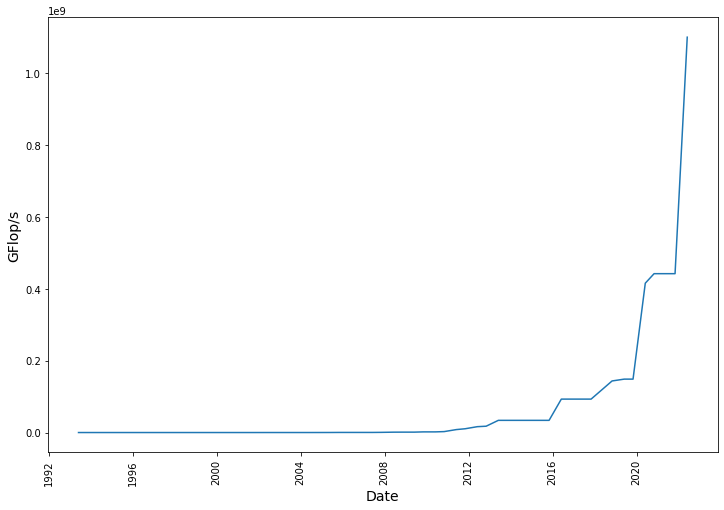

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(top500.keys(), top500.values)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("GFlop/s", fontsize=14)
plt.xticks(rotation = 90);

напоминает логарифмическую зависимость, посмотрим в лог. масштабе

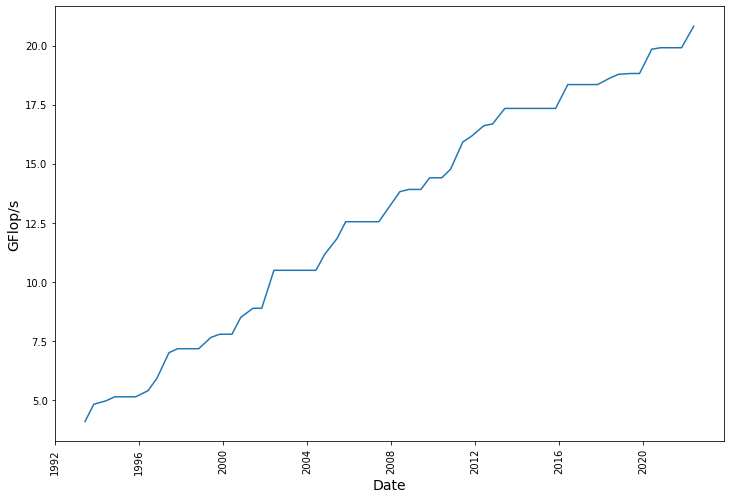

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(top500.keys(), np.log(top500.values))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("GFlop/s", fontsize=14)
plt.xticks(rotation = 90);

для прогнозирования подойдет линейная регрессия

In [39]:
x = np.array(list(range(top500.shape[0])))[:, None]
y = np.log(top500.values)

In [40]:
lin_reg_model = LinearRegression(normalize=True)

In [ ]:
lin_reg_model.fit(x, y)

In [66]:
dates_to_predict = {
    59: "11/2022",
    60: "06/2023",
    61: "11/2023",
    62: "06/2024",
    63: "11/2024",
    64: "06/2025",
    65: "11/2025"
}

In [68]:
list(dates_to_predict.values())

['11/2022', '06/2023', '11/2023', '06/2024', '11/2024', '06/2025', '11/2025']

In [81]:
list(pd.Series(dates_to_predict.values()).apply(pd.Timestamp))

Timestamp('2022-11-01 00:00:00')

In [52]:
x_test = np.array(list(range(top500.shape[0])) + list(dates_to_predict.keys()))[:, None]

In [53]:
predicted = np.exp(lin_reg_model.predict(x_test))

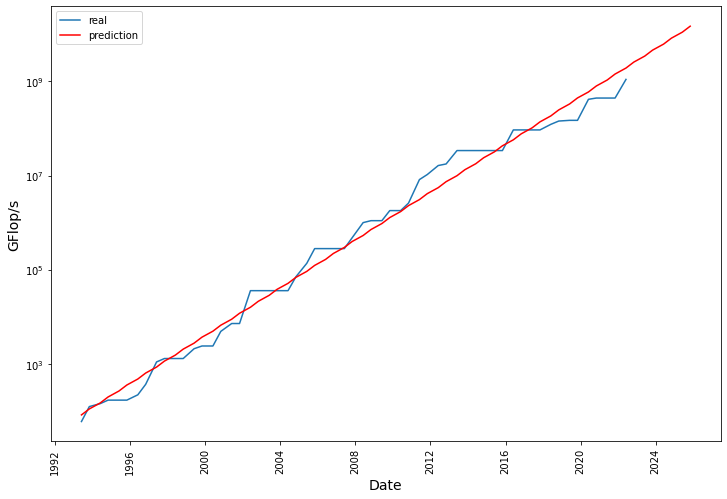

In [83]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(top500.keys(), top500.values, label="real")
ax.plot(list(top500.keys()) + list(pd.Series(dates_to_predict.values()).apply(pd.Timestamp)), predicted, color="r", label="prediction")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("GFlop/s", fontsize=14)
ax.legend()
plt.xticks(rotation = 90);
plt.yscale("log")

В конце 2025 года по прогнозам мы получим производительность:

In [84]:
print(f"{predicted[-1]/ 1e9} EFlop/s")

14.838624469265383 EFlop/s


Ответ: 14.83 EFlop/s

# 2 оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

In [99]:
data = pd.read_excel('TOP500_202206.xlsx')

суммарное потребление энергии

In [136]:
data['Power (kW)'].isna().sum()

309

у нас нет данных по 309 компьюетрам, будем рассматривать итоговый ответ только для оставшихся компьютеров

In [137]:
top500_sum_energy = data['Power (kW)'].dropna().sum()

In [138]:
top500_sum_energy

340486.45

In [139]:
top500_power = top500_sum_energy * 24 * 365 # Умножаем на количество часов в году

In [140]:
top500_power

2982661302.0000005

по данным https://energystats.enerdata.net/total-energy/world-consumption-statistics.html потребление электроэнергии составило около 1400 Mtoe

In [141]:
world_enegry = 1400 * 11630000000

In [143]:
print(f"{round(((top500_power / world_enegry) * 100), 4)}% потребляют суперкомпьютеры (191 из топ 500 по которым есть данные) от производимого эл-ва")

0.0183% потребляют суперкомпьютеры (191 из топ 500 по которым есть данные) от производимого эл-ва
